In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import geopandas as gpd
from shapely import wkt
plt.style.use('fivethirtyeight')

## data import

In [2]:
data = pd.read_csv("airbnbmark1.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (27,61,62,94,95) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

In [4]:
pd.set_option('display.max_seq_items',None)

In [5]:
data

id                            listing_url       scrape_id  \
0           2595      https://www.airbnb.com/rooms/2595  20200212052319   
1           3831      https://www.airbnb.com/rooms/3831  20200212052319   
2           5099      https://www.airbnb.com/rooms/5099  20200212052319   
3           5121      https://www.airbnb.com/rooms/5121  20200212052319   
4           5178      https://www.airbnb.com/rooms/5178  20200212052319   
...          ...                                    ...             ...   
153249  42890680  https://www.airbnb.com/rooms/42890680  20200313233810   
153250  42890730  https://www.airbnb.com/rooms/42890730  20200313233810   
153251  42891018  https://www.airbnb.com/rooms/42891018  20200313233810   
153252  42891637  https://www.airbnb.com/rooms/42891637  20200313233810   
153253  42892717  https://www.airbnb.com/rooms/42892717  20200313233810   

       last_scraped                                               name  \
0        2020-02-12                              Skylit Midtown Castle   
1        2020-02-13                    Cozy Entire Floor of Brownstone   
2        2020-02-12          Large Cozy 1 BR Apartment In Midtown East   
3        2020-02-12                                    BlissArtsSpace!   
4        2020-02-13                   Large Furnished Room Near B'way    
...             ...                                                ...   
153249   2020-03-14         NYC Best Location Minutes to Times Square!   
153250   2020-03-14                                     New York Oasis   
153251   2020-03-14                   Beautiful West Village Apartment   
153252   2020-03-14                             Brooklyn room for rent   
153253   2020-03-14  Newly Renovated 2 BDR Apt. One Block from the ...   

                                                  summary  \
0       Beautiful, spacious skylit studio in the heart...   
1       Urban retreat: enjoy 500 s.f. floor in 1899 br...   
2       My large 1 bedroom apartment has a true New Yo...   
3                                                     NaN   
4       Please don’t expect the luxury here just a bas...   
...                                                   ...   
153249  Get to Time Square in minutes!  New York can b...   
153250  Cozy studio in the center of Manhattan. Close ...   
153251  Beautiful loft in the heart of the west villag...   
153252                                                NaN   
153253                                                NaN   

                                                    space  \
0       - Spacious (500+ft²), immaculate and nicely fu...   
1       Greetings!      We own a double-duplex brownst...   
2       I have a large 1 bedroom apartment centrally l...   
3       HELLO EVERYONE AND THANKS FOR VISITING BLISS A...   
4       You will use one large, furnished, private roo...   
...                                                   ...   
153249  My bedroom is not a big as it seems to be, it ...   
153250                           Best deal in the city!!!   
153251                                                NaN   
153252                                                NaN   
153253                                                NaN   

                                              description experiences_offered  \
0       Beautiful, spacious skylit studio in the heart...                none   
1       Urban retreat: enjoy 500 s.f. floor in 1899 br...                none   
2       My large 1 bedroom apartment has a true New Yo...                none   
3       HELLO EVERYONE AND THANKS FOR VISITING BLISS A...                none   
4       Please don’t expect the luxury here just a bas...                none   
...                                                   ...                 ...   
153249  Get to Time Square in minutes!  New York can b...                none   
153250  Cozy studio in the center of Manhattan. Close ...                none   
153251  Beautiful loft in the

## airbnb 위치(Borough별로)

In [6]:
data["neighbourhood_group_cleansed"].unique()

array(['Manhattan', 'Brooklyn', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [7]:
data.rename(columns={'neighbourhood_group_cleansed':'boroname'}, inplace=True)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

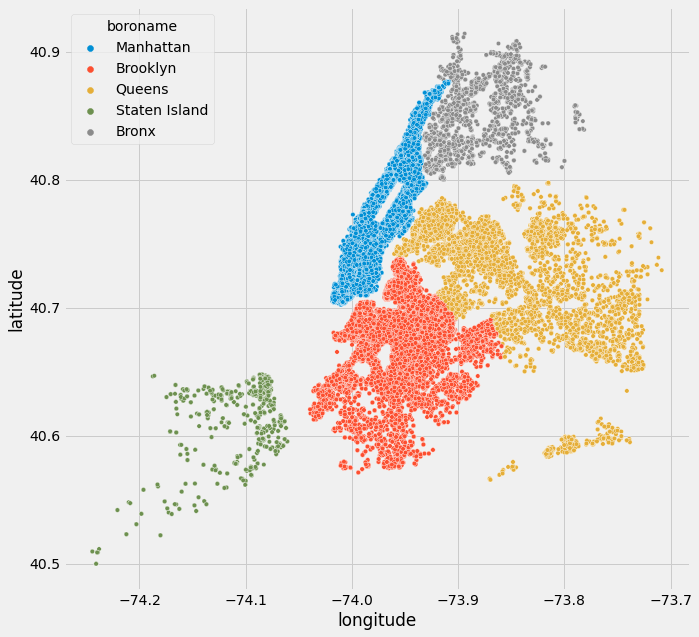

In [8]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='longitude', y='latitude', hue='boroname',s=20, data=data)

## 행정자치구별 비율

In [9]:
borough_count = data.groupby('boroname').agg('count').reset_index()

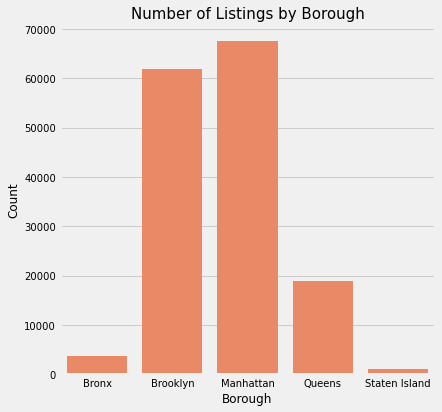

In [48]:
#Plot the count by borough
fig, ax1 = plt.subplots(1,1, figsize=(6,6)
                       )
sns.barplot(x='boroname', y='id', data=borough_count, ax=ax1, color="coral")

ax1.set_title('Number of Listings by Borough', fontsize=15)
ax1.set_xlabel('Borough', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)
ax1.tick_params(axis='both', labelsize=10)

## Borough별 분포

In [11]:
#Here we are using geopandas to bring in a base layer of NYC boroughs
nyc = gpd.read_file(gpd.datasets.get_path('nybb'))
nyc.head(5)

BoroCode       BoroName     Shape_Leng    Shape_Area  \
0         5  Staten Island  330470.010332  1.623820e+09   
1         4         Queens  896344.047763  3.045213e+09   
2         3       Brooklyn  741080.523166  1.937479e+09   
3         1      Manhattan  359299.096471  6.364715e+08   
4         2          Bronx  464392.991824  1.186925e+09   

                                            geometry  
0  MULTIPOLYGON (((970217.022 145643.332, 970227....  
1  MULTIPOLYGON (((1029606.077 156073.814, 102957...  
2  MULTIPOLYGON (((1021176.479 151374.797, 102100...  
3  MULTIPOLYGON (((981219.056 188655.316, 980940....  
4  MULTIPOLYGON (((1012821.806 229228.265, 101278...

In [12]:
#Rename the column to boroname, so that we can join the data to it on a common field
nyc.rename(columns={'BoroName':'boroname'}, inplace=True)
bc_geo = nyc.merge(borough_count, on='boroname')

<ipython-input-13-7e9fde5d080d>:4: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  bc_geo.apply(lambda x: ax.annotate(s=x.boroname, color='black', xy=x.geometry.centroid.coords[0],ha='center'), axis=1)


(905464.739038086, 1075092.8783935548, 112485.76063504723, 280480.41425942676)

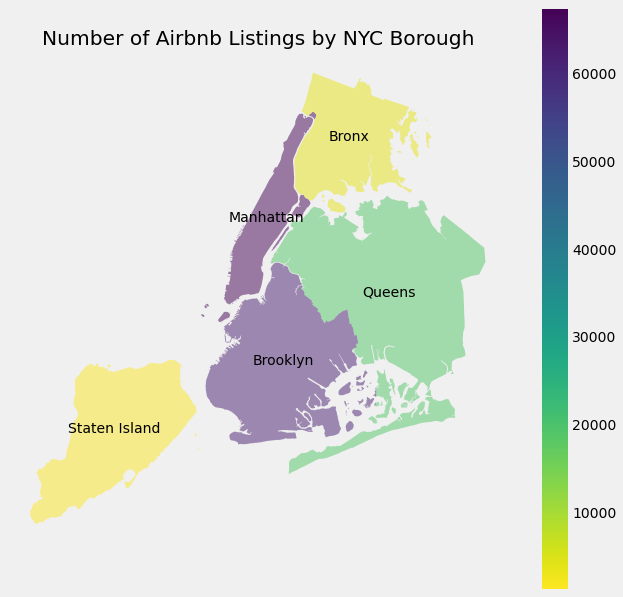

In [13]:
#Plot the count by borough into a map
fig,ax = plt.subplots(1,1, figsize=(10,10))
bc_geo.plot(column='id', cmap='viridis_r', alpha=.5, ax=ax, legend=True)
bc_geo.apply(lambda x: ax.annotate(s=x.boroname, color='black', xy=x.geometry.centroid.coords[0],ha='center'), axis=1)
plt.title("Number of Airbnb Listings by NYC Borough")
plt.axis('off')

## neighbourhood경계 추가

In [14]:
nbhoods = pd.read_csv('nynta.csv')
nbhoods.head(5)

the_geom  BoroCode  BoroName  \
0  MULTIPOLYGON (((-73.94732672160586 40.62916656...         3  Brooklyn   
1  MULTIPOLYGON (((-73.94193078816201 40.70072523...         3  Brooklyn   
2  MULTIPOLYGON (((-73.89138023380268 40.86170058...         2     Bronx   
3  MULTIPOLYGON (((-73.9760493559142 40.631275905...         3  Brooklyn   
4  MULTIPOLYGON (((-73.90855790522774 40.65209593...         3  Brooklyn   

   CountyFIPS NTACode               NTAName    Shape_Leng    Shape_Area  
0          47    BK43               Midwood  27996.591274  3.579964e+07  
1          47    BK75               Bedford  29992.919174  3.262983e+07  
2           5    BX40         Fordham South  15878.272921  6.307284e+06  
3          47    BK88          Borough Park  39247.227722  5.400502e+07  
4          47    BK96  Rugby-Remsen Village  30957.853395  3.270695e+07

In [15]:
nbhoods

the_geom  BoroCode  \
0    MULTIPOLYGON (((-73.94732672160586 40.62916656...         3   
1    MULTIPOLYGON (((-73.94193078816201 40.70072523...         3   
2    MULTIPOLYGON (((-73.89138023380268 40.86170058...         2   
3    MULTIPOLYGON (((-73.9760493559142 40.631275905...         3   
4    MULTIPOLYGON (((-73.90855790522774 40.65209593...         3   
5    MULTIPOLYGON (((-73.79493246234003 40.75779803...         4   
6    MULTIPOLYGON (((-73.84913837242911 40.69828274...         4   
7    MULTIPOLYGON (((-73.93753749374048 40.60855739...         3   
8    MULTIPOLYGON (((-73.77573836927105 40.74332564...         4   
9    MULTIPOLYGON (((-73.84704957988549 40.88767181...         2   
10   MULTIPOLYGON (((-73.80379022888253 40.77561011...         4   
11   MULTIPOLYGON (((-73.86109724401761 40.76366447...         4   
12   MULTIPOLYGON (((-73.89880698433517 40.65740666...         3   
13   MULTIPOLYGON (((-73.89880698433517 40.65740666...         3   
14   MULTIPOLYGON (((-73.97482741755584 40.64566342...         3   
15   MULTIPOLYGON (((-73.86033845846154 40.83325316...         2   
16   MULTIPOLYGON (((-73.9482649959084 40.638607190...         3   
17   MULTIPOLYGON (((-73.72677759533717 40.70305929...         4   
18   MULTIPOLYGON (((-73.92574389425866 40.64001446...         3   
19   MULTIPOLYGON (((-73.96285973961463 40.61254948...         3   
20   MULTIPOLYGON (((-73.88828531356063 40.64672241...         3   
21   MULTIPOLYGON (((-73.89696589084865 40.83434214...         2   
22   MULTIPOLYGON (((-73.86790963860365 40.74493371...         4   
23   MULTIPOLYGON (((-73.98255629297823 40.73135013...         1   
24   MULTIPOLYGON (((-73.7104999536208 40.727227087...         4   
25   MULTIPOLYGON (((-73.8948352292406 40.826246841...         2   
26   MULTIPOLYGON (((-73.93804640603445 40.78082954...         1   
27   MULTIPOLYGON (((-73.94933170560962 40.78519312...         1   
28   MULTIPOLYGON (((-73.97984261884459 40.66072744...         3   
29   MULTIPOLYGON (((-73.76809925805183 40.59784597...         4   
30   MULTIPOLYGON (((-73.87287195903883 40.78597502...         2   
31   MULTIPOLYGON (((-73.88438994861662 40.82296739...         2   
32   MULTIPOLYGON (((-73.87365721712088 40.75680348...         4   
33   MULTIPOLYGON (((-74.00200394677513 40.59413237...         3   
34   MULTIPOLYGON (((-74.06503332356236 40.58899099...         5   
35   MULTIPOLYGON (((-73.95870789822976 40.65038727...         3   
36   MULTIPOLYGON (((-73.9012927762704 40.820475442...         2   
37   MULTIPOLYGON (((-73.90404639808897 40.67922059...         3   
38   MULTIPOLYGON (((-73.9521012514923 40.811442853...         1   
39   MULTIPOLYGON (((-73.86033845846154 40.83325316...         2   
40   MULTIPOLYGON (((-73.85363638793234 40.87330059...         2   
41   MULTIPOLYGON (((-73.75670329233547 40.72622943...         4   
42   MULTIPOLYGON (((-73.75725671509146 40.71813860...         4   
43   MULTIPOLYGON (((-73.9186022474009 40.632068328...         3   
44   MULTIPOLYGON (((-73.86106295016758 40.67434293...         3   
45   MULTIPOLYGON (((-73.9060791797798 40.873242420...         2   
46   MULTIPOLYGON (((-73.76031464000948 40.67510997...         4   
47   MULTIPOLYGON (((-73.8883392925636 40.646710228...         3   
48   MULTIPOLYGON (((-73.8830938237215 40.866602185...         2   
49   MULTIPOLYGON (((-73.94607828674233 40.82126321...         1   
50   MULTIPOLYGON (((-73.98990295970057 40.73443479...         1   
51   MULTIPOLYGON (((-74.08155470057667 40.60629029...         5   
52   MULTIPOLYGON (((-73.72816233855367 40.72308413...         4   
53   MULTIPOLYGON (((-73.98382387298197 40.72147287...         1   
54   MULTIPOLYGON (((-73.7883334983454 40.834667129...         2   
55   MULTIPOLYGON (((-73.83737956188605 40.89392474...         2   
56   MULTIPOLYGON (((-73.92827730832724 40.77689897...         4   
57   MULTIPOLYGON (((-73.90202516499484 40.76741678...         4   
58   MULTIPOLYGON (((-73.962365968

In [16]:
#There is a lot going on here... first rename the column
nbhoods.rename(columns={'NTAName':'neighbourhood'}, inplace=True)

#Then, since this is a csv file, convert the geometry column text into well known text, this will allow you to plot its geometry correctly
nbhoods['geom'] = nbhoods['the_geom'].apply(wkt.loads)

#Now convert the pandas dataframe into a Geopandas GeoDataFrame
nbhoods = gpd.GeoDataFrame(nbhoods, geometry='geom')

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

<Figure size 432x288 with 0 Axes>

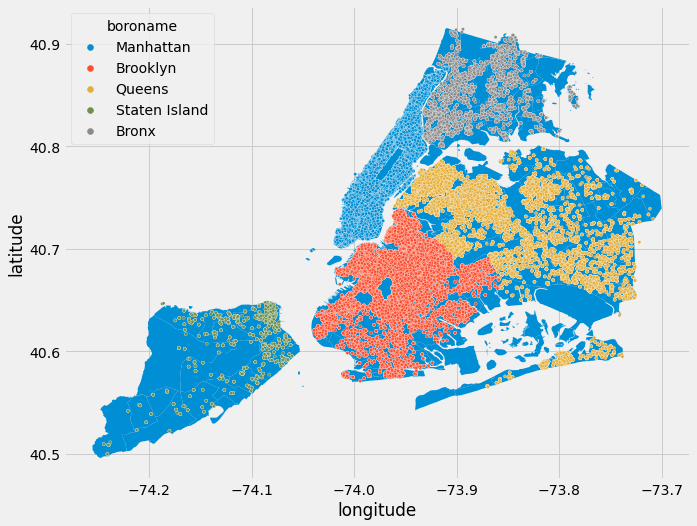

In [17]:
plt.figure()
fig,ax = plt.subplots(1,1, figsize=(10,10))
nbhoods.plot(ax=ax)
sns.scatterplot(x='longitude', y='latitude', hue='boroname',s=10, data=data)

In [18]:
nbhood_count = data.groupby('neighbourhood').agg('count').reset_index()

In [19]:
nb_count_geo = nbhoods.merge(nbhood_count, on='neighbourhood')
nb_count_geo.head(3)

the_geom  BoroCode  BoroName  \
0  MULTIPOLYGON (((-73.94732672160586 40.62916656...         3  Brooklyn   
1  MULTIPOLYGON (((-73.9760493559142 40.631275905...         3  Brooklyn   
2  MULTIPOLYGON (((-73.84913837242911 40.69828274...         4    Queens   

   CountyFIPS NTACode neighbourhood    Shape_Leng    Shape_Area  \
0          47    BK43       Midwood  27996.591274  3.579964e+07   
1          47    BK88  Borough Park  39247.227722  5.400502e+07   
2          81    QN53     Woodhaven  28070.585548  3.700132e+07   

                                                geom   id  listing_url  \
0  MULTIPOLYGON (((-73.94733 40.62917, -73.94687 ...  186          186   
1  MULTIPOLYGON (((-73.97605 40.63128, -73.97717 ...   48           48   
2  MULTIPOLYGON (((-73.84914 40.69828, -73.84948 ...  176          176   

   scrape_id  last_scraped  name  summary  space  description  \
0        186           186   186      181    127          181   
1         48            48    48       48     29           48   
2        176           176   176      164    139          176   

   experiences_offered  neighborhood_overview  notes  transit  access  \
0                  186                    141     88      131     117   
1                   48                     35     27       34      30   
2                  176                    139     95      136     118   

   interaction  house_rules  thumbnail_url  medium_url  picture_url  \
0          105          127              0           0          186   
1           37           31              0           0           48   
2          128          118              0           0          176   

   xl_picture_url  host_id  host_url  host_name  host_since  host_location  \
0               0      186       186        186         186            186   
1               0       48        48         48          48             48   
2               0      176       176        175         175            175   

   host_about  host_response_time  host_response_rate  host_acceptance_rate  \
0         100                 114                 114                    85   
1          33                  40                  40                    29   
2         110                 139                 139                   114   

   host_is_superhost  host_thumbnail_url  host_picture_url  \
0                186                 186               186   
1                 48                  48                48   
2                175                 175               175   

   host_neighbourhood  host_listings_count  host_total_listings_count  \
0                 133                  186                        186   
1                  38                   48                         48   
2                 149                  175                        175   

   host_verifications  host_has_profile_pic  host_identity_verified  street  \
0                 186                   186                     186     186   
1                  48                    48                      48      48   
2                 176                   175                     175     176   

   neighbourhood_cleansed  boroname  city  state  zipcode  market  \
0                     186       186   186    186      180     186   
1                      48        48    48     48       48      48   
2                     176       176   173    176      176     176   

   smart_location  country_code  country  latitude  longitude  \
0             186           186      186       186        186   
1              48            48       48        48         48   
2             176           176      176       176        176   

   is_location_exact  property_type  room_type  accommodates  bathrooms  \
0                186            186        186           186        186   
1                 48             48         48            48         48   
2                176            176        176           176        176   

   bed

## neighbourhood별 분포

In [20]:
#Create a point of each Airbnb location, and enable the "data" dataframe into a geopandas dataframe
data = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.longitude, data.latitude))

#Now, do a spatial join... This code here runs an intersect analysis to find which neighborhood the Airbnb location is in
joined = gpd.sjoin(nbhoods, data, how='inner', op='intersects')

In [21]:
#Lets take a look 
joined.head(3)

the_geom  BoroCode  BoroName  \
0  MULTIPOLYGON (((-73.94732672160586 40.62916656...         3  Brooklyn   
0  MULTIPOLYGON (((-73.94732672160586 40.62916656...         3  Brooklyn   
0  MULTIPOLYGON (((-73.94732672160586 40.62916656...         3  Brooklyn   

   CountyFIPS NTACode neighbourhood_left    Shape_Leng    Shape_Area  \
0          47    BK43            Midwood  27996.591274  3.579964e+07   
0          47    BK43            Midwood  27996.591274  3.579964e+07   
0          47    BK43            Midwood  27996.591274  3.579964e+07   

                                                geom  index_right        id  \
0  MULTIPOLYGON (((-73.94733 40.62917, -73.94687 ...       134989  29917648   
0  MULTIPOLYGON (((-73.94733 40.62917, -73.94687 ...        85174  29917648   
0  MULTIPOLYGON (((-73.94733 40.62917, -73.94687 ...        33275  29917648   

                             listing_url       scrape_id last_scraped  \
0  https://www.airbnb.com/rooms/29917648  20200313233810   2020-03-14   
0  https://www.airbnb.com/rooms/29917648  20200103021948   2020-01-03   
0  https://www.airbnb.com/rooms/29917648  20200212052319   2020-02-13   

                                                name summary space  \
0  Perfect Studio apartment in heart of Sheepshea...     NaN   NaN   
0  Perfect Studio apartment in heart of Sheepshea...     NaN   NaN   
0  Perfect Studio apartment in heart of Sheepshea...     NaN   NaN   

  description experiences_offered neighborhood_overview notes transit access  \
0         NaN                none                   NaN   NaN     NaN    NaN   
0         NaN                none                   NaN   NaN     NaN    NaN   
0         NaN                none                   NaN   NaN     NaN    NaN   

  interaction house_rules  thumbnail_url  medium_url  \
0         NaN         NaN            NaN         NaN   
0         NaN         NaN            NaN         NaN   
0         NaN         NaN            NaN         NaN   

                                         picture_url  xl_picture_url  host_id  \
0  https://a0.muscache.com/im/pictures/8b2c248f-3...             NaN  9059810   
0  https://a0.muscache.com/im/pictures/8b2c248f-3...             NaN  9059810   
0  https://a0.muscache.com/im/pictures/8b2c248f-3...             NaN  9059810   

                                    host_url host_name  host_since  \
0  https://www.airbnb.com/users/show/9059810      Vlad  2013-09-25   
0  https://www.airbnb.com/users/show/9059810      Vlad  2013-09-25   
0  https://www.airbnb.com/users/show/9059810      Vlad  2013-09-25   

                       host_location host_about  host_response_time  \
0  Brooklyn, New York, United States        NaN      within an hour   
0  Brooklyn, New York, United States        NaN  within a few hours   
0  Brooklyn, New York, United States        NaN  within a few hours   

  host_response_rate host_acceptance_rate host_is_superhost  \
0               100%                   0%                 f   
0                86%                  NaN                 f   
0               100%                   0%                 f   

                                  host_thumbnail_url  \
0  https://a0.muscache.com/im/pictures/user/92d18...   
0  https://a0.muscache.com/im/pictures/user/92d18...   
0  https://a0.muscache.com/im/pictures/user/92d18...   

                                    host_picture_url host_neighbourhood  \
0  https://a0.muscache.com/im/pictures/user/92d18...                NaN   
0  https://a0.muscache.com/im/pictures/user/92d18...                NaN   
0  https://a0.muscache.com/im/pictures/user/92d18...                NaN   

   host_listings_count  host_total_listings_count  \
0                  2.0                        2.0   
0                  2.0                        2.0   
0                  2.0                        2.0   

                                  host_verifications host_has_profile_pic  \
0  ['email', 'phone', 'offline_government_id', 's... 

In [22]:
#Drop the second geometry column
joined.drop(columns='geom', inplace=True)

In [23]:
#Rename the column. 
joined.rename(columns={'neighbourhood_left':'neighbourhood'}, inplace=True)

#Create a count of each neighborhood
nb_join_count = joined.groupby('neighbourhood').agg('count').reset_index()

In [24]:
#Get the "true count". Join this data to the original neighborhoods geometry 
true_count = nbhoods.merge(nb_join_count, on='neighbourhood')

Text(0.5, 1.0, '2020 Number of Airbnb listings by Neighborhood in NYC')

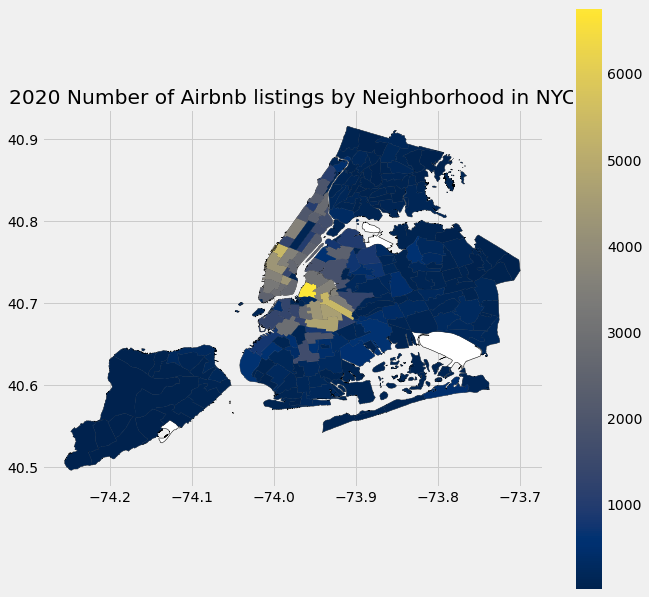

In [25]:
#Lets plot the data
fig,ax = plt.subplots(1,1, figsize=(10,10))

base = nbhoods.plot(color='white', edgecolor='black', ax=ax)

true_count.plot(column='id',cmap='cividis', ax=base, legend=True)
plt.title('2020 Number of Airbnb listings by Neighborhood in NYC')

## 지하철 위치 정보 import

In [26]:
subways = pd.read_csv('DOITT_SUBWAY_STATION_01_13SEPT2010.csv')
subways.head(5)

URL  OBJECTID              NAME  \
0  http://web.mta.info/nyct/service/         1          Astor Pl   
1  http://web.mta.info/nyct/service/         2          Canal St   
2  http://web.mta.info/nyct/service/         3           50th St   
3  http://web.mta.info/nyct/service/         4         Bergen St   
4  http://web.mta.info/nyct/service/         5  Pennsylvania Ave   

                                       the_geom           LINE  \
0  POINT (-73.99106999861966 40.73005400028978)  4-6-6 Express   
1  POINT (-74.00019299927328 40.71880300107709)  4-6-6 Express   
2  POINT (-73.98384899986625 40.76172799961419)            1-2   
3  POINT (-73.97499915116808 40.68086213682956)          2-3-4   
4  POINT (-73.89488591154061 40.66471445143568)            3-4   

                                               NOTES  
0  4 nights, 6-all times, 6 Express-weekdays AM s...  
1  4 nights, 6-all times, 6 Express-weekdays AM s...  
2                              1-all times, 2-nights  
3           4-nights, 3-all other times, 2-all times  
4                        4-nights, 3-all other times

In [27]:
#Then, since this is a csv file, convert the geometry column text into well known text, this will allow you to plot its geometry correctly
subways['geom'] = subways['the_geom'].apply(wkt.loads)

#Now convert the pandas dataframe into a Geopandas GeoDataFrame
subways = gpd.GeoDataFrame(subways, geometry='geom')

## NYC 지하철 노선도

Text(0.5, 1.0, 'NYC Subway Stations')

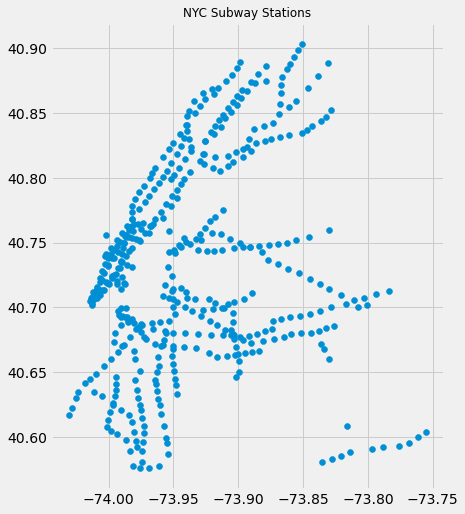

In [28]:
#Lets take a look at what the neighborhoods look like
fig,ax = plt.subplots(1,1, figsize=(8,8))
subways.plot(ax=ax)
plt.title('NYC Subway Stations', fontsize=12)

In [29]:
#subways = subways[subways['LINE'].str.contains('4') | (subways['LINE'].str.contains('D'))]

In [30]:
# #Lets take a look at what the neighborhoods look like
# fig,ax = plt.subplots(1,1, figsize=(8,8))
# subways.plot(ax=ax)
# plt.title('NYC Subway Stations Servicing 4 and D lines', fontsize=10)

In [31]:
# #Plot the count by borough into a map
# fig,ax = plt.subplots(1,1, figsize=(10,10))

# subways.plot(markersize=50, color='green',ax=ax, label='Subways')

# man_bronx_geo.plot(column='BoroName', cmap = 'tab20b',alpha=.5, ax=ax, legend=True)

# plt.title("Bronx, Manhattan")

# handles, labels = ax.get_legend_handles_labels()
# fig.legend(handles, labels, loc='center right')

## airbnb 분포와 지하철 위치

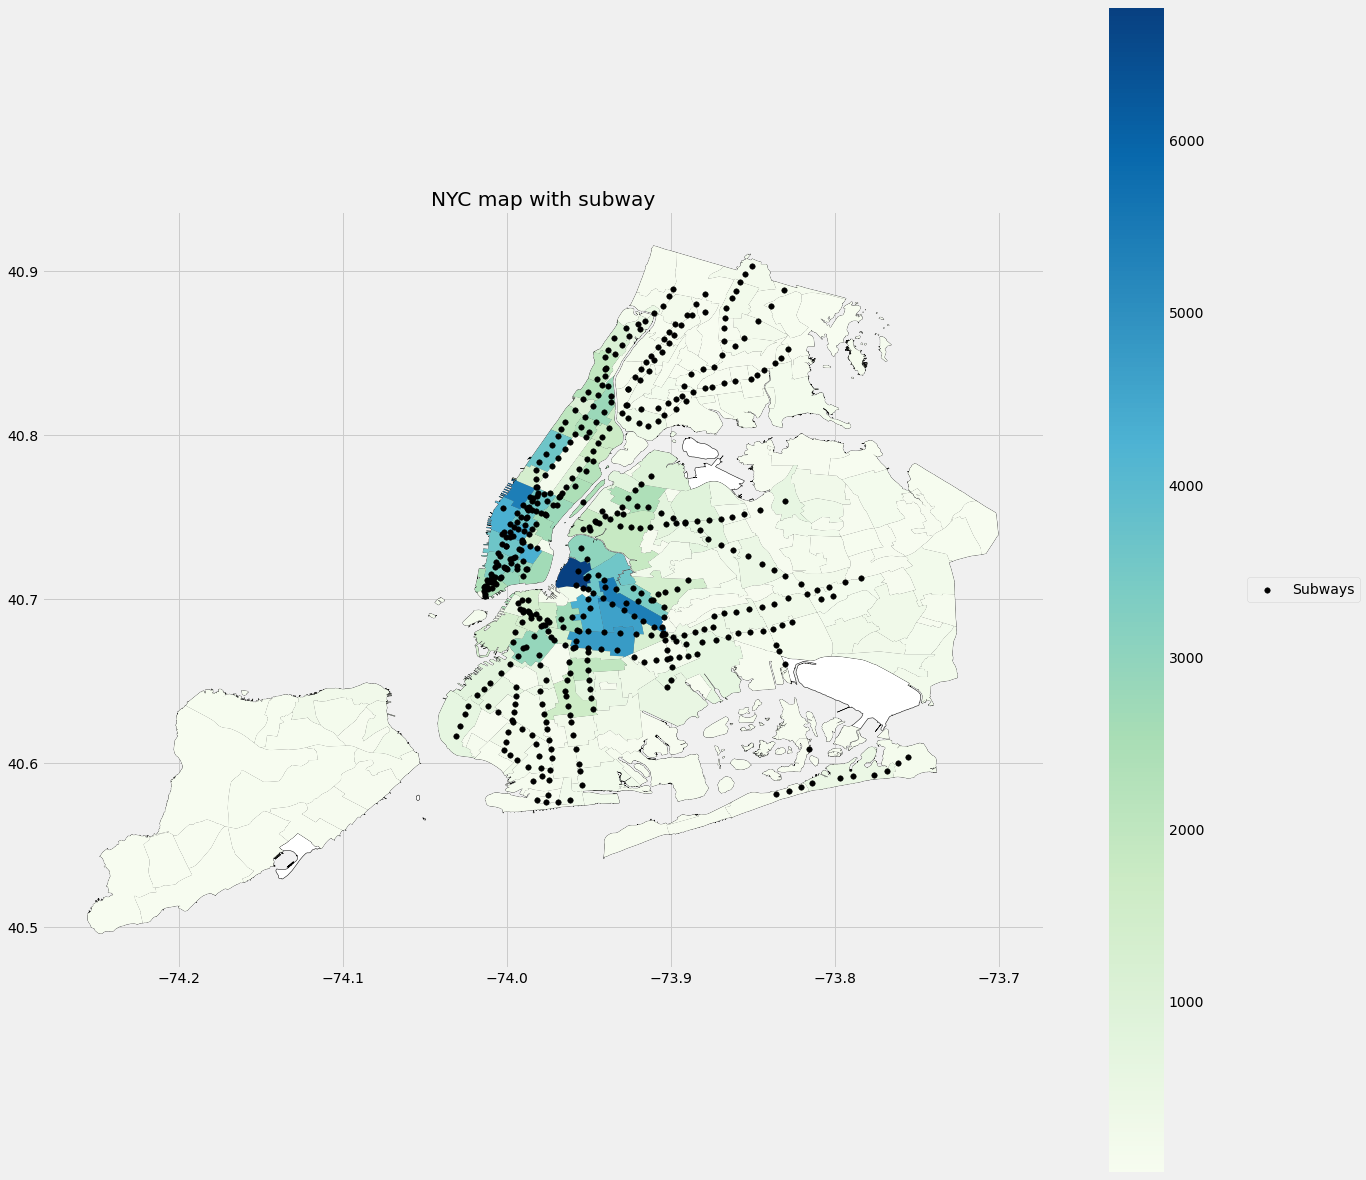

In [32]:
fig,ax = plt.subplots(1,1, figsize=(20,20))

base = nbhoods.plot(color='white', edgecolor='black', ax=ax)

true_count.plot(column='id',cmap='GnBu', ax=base, legend=True)

subways.plot(markersize=30, color='black',ax=ax, label='Subways')

plt.title("NYC map with subway")

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='center right')

## 각 airbnb별 인접한 지하철 역의 수

In [33]:
airbnbs = pd.DataFrame()
airbnbs["no."] = range(1,len(data)+1)
airbnbs["lon"] = data.longitude
airbnbs["lat"] = data.latitude
airbnbs = gpd.GeoDataFrame(airbnbs, geometry=gpd.points_from_xy(airbnbs.lon, airbnbs.lat))

In [34]:
airbnbs.crs={'init' :'epsg:2263'}

C:\ProgramData\Anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [35]:
lat = airbnbs["lat"]
lon = airbnbs["lon"]

In [36]:
airbnbs

no.        lon        lat                    geometry
0            1 -73.983770  40.753620  POINT (-73.98377 40.75362)
1            2 -73.959760  40.685140  POINT (-73.95976 40.68514)
2            3 -73.975000  40.747670  POINT (-73.97500 40.74767)
3            4 -73.955960  40.686880  POINT (-73.95596 40.68688)
4            5 -73.984930  40.764890  POINT (-73.98493 40.76489)
...        ...        ...        ...                         ...
153249  153250 -73.946340  40.814840  POINT (-73.94634 40.81484)
153250  153251 -73.987225  40.769807  POINT (-73.98723 40.76981)
153251  153252 -74.002622  40.736252  POINT (-74.00262 40.73625)
153252  153253 -73.953400  40.663870  POINT (-73.95340 40.66387)
153253  153254 -73.964250  40.677520  POINT (-73.96425 40.67752)

[153254 rows x 4 columns]

In [37]:
subways.crs= {'init' :'epsg:2263'}

C:\ProgramData\Anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [38]:
subways

URL  OBJECTID                         NAME  \
0    http://web.mta.info/nyct/service/         1                     Astor Pl   
1    http://web.mta.info/nyct/service/         2                     Canal St   
2    http://web.mta.info/nyct/service/         3                      50th St   
3    http://web.mta.info/nyct/service/         4                    Bergen St   
4    http://web.mta.info/nyct/service/         5             Pennsylvania Ave   
..                                 ...       ...                          ...   
468  http://web.mta.info/nyct/service/       469  Coney Island - Stillwell Av   
469  http://web.mta.info/nyct/service/       470       34th St - Hudson Yards   
470  http://web.mta.info/nyct/service/       641                      72nd St   
471  http://web.mta.info/nyct/service/       642                      86th St   
472  http://web.mta.info/nyct/service/       643                      96th St   

                                         the_geom           LINE  \
0    POINT (-73.99106999861966 40.73005400028978)  4-6-6 Express   
1    POINT (-74.00019299927328 40.71880300107709)  4-6-6 Express   
2    POINT (-73.98384899986625 40.76172799961419)            1-2   
3    POINT (-73.97499915116808 40.68086213682956)          2-3-4   
4    POINT (-73.89488591154061 40.66471445143568)            3-4   
..                                            ...            ...   
468   POINT (-73.9812359981396 40.57728100006751)        D-F-N-Q   
469  POINT (-74.00219709442206 40.75544635961596)    7-7 Express   
470  POINT (-73.95836178682246 40.76880251014895)              Q   
471  POINT (-73.95177090964917 40.77786104333163)              Q   
472  POINT (-73.9470660219183 40.784236650177654)              Q   

                                                 NOTES  \
0    4 nights, 6-all times, 6 Express-weekdays AM s...   
1    4 nights, 6-all times, 6 Express-weekdays AM s...   
2                                1-all times, 2-nights   
3             4-nights, 3-all other times, 2-all times   
4                          4-nights, 3-all other times   
..                                                 ...   
468                                  D,F,N,Q-all times   
469  7-all times, 7 Express-rush hours AM westbound...   
470                                        Q-all times   
471                                        Q-all times   
472                                        Q-all times   

                           geom  
0    POINT (-73.99107 40.73005)  
1    POINT (-74.00019 40.71880)  
2    POINT (-73.98385 40.76173)  
3    POINT (-73.97500 40.68086)  
4    POINT (-73.89489 40.66471)  
..                          ...  
468  POINT (-73.98124 40.57728)  
469  POINT (-74.00220 40.75545)  
470  POINT (-73.95836 40.76880)  
471  POINT (-73.95177 40.77786)  
472  POINT (-73.94707 40.78424)  

[473 rows x 7 columns]

In [39]:
subways.crs.axis_info[0]

Axis(name=Easting, abbrev=E, direction=east, unit_auth_code=EPSG, unit_code=9003, unit_name=US survey foot)

In [40]:
airbnbs

no.        lon        lat                    geometry
0            1 -73.983770  40.753620  POINT (-73.98377 40.75362)
1            2 -73.959760  40.685140  POINT (-73.95976 40.68514)
2            3 -73.975000  40.747670  POINT (-73.97500 40.74767)
3            4 -73.955960  40.686880  POINT (-73.95596 40.68688)
4            5 -73.984930  40.764890  POINT (-73.98493 40.76489)
...        ...        ...        ...                         ...
153249  153250 -73.946340  40.814840  POINT (-73.94634 40.81484)
153250  153251 -73.987225  40.769807  POINT (-73.98723 40.76981)
153251  153252 -74.002622  40.736252  POINT (-74.00262 40.73625)
153252  153253 -73.953400  40.663870  POINT (-73.95340 40.66387)
153253  153254 -73.964250  40.677520  POINT (-73.96425 40.67752)

[153254 rows x 4 columns]

In [41]:
subways

URL  OBJECTID                         NAME  \
0    http://web.mta.info/nyct/service/         1                     Astor Pl   
1    http://web.mta.info/nyct/service/         2                     Canal St   
2    http://web.mta.info/nyct/service/         3                      50th St   
3    http://web.mta.info/nyct/service/         4                    Bergen St   
4    http://web.mta.info/nyct/service/         5             Pennsylvania Ave   
..                                 ...       ...                          ...   
468  http://web.mta.info/nyct/service/       469  Coney Island - Stillwell Av   
469  http://web.mta.info/nyct/service/       470       34th St - Hudson Yards   
470  http://web.mta.info/nyct/service/       641                      72nd St   
471  http://web.mta.info/nyct/service/       642                      86th St   
472  http://web.mta.info/nyct/service/       643                      96th St   

                                         the_geom           LINE  \
0    POINT (-73.99106999861966 40.73005400028978)  4-6-6 Express   
1    POINT (-74.00019299927328 40.71880300107709)  4-6-6 Express   
2    POINT (-73.98384899986625 40.76172799961419)            1-2   
3    POINT (-73.97499915116808 40.68086213682956)          2-3-4   
4    POINT (-73.89488591154061 40.66471445143568)            3-4   
..                                            ...            ...   
468   POINT (-73.9812359981396 40.57728100006751)        D-F-N-Q   
469  POINT (-74.00219709442206 40.75544635961596)    7-7 Express   
470  POINT (-73.95836178682246 40.76880251014895)              Q   
471  POINT (-73.95177090964917 40.77786104333163)              Q   
472  POINT (-73.9470660219183 40.784236650177654)              Q   

                                                 NOTES  \
0    4 nights, 6-all times, 6 Express-weekdays AM s...   
1    4 nights, 6-all times, 6 Express-weekdays AM s...   
2                                1-all times, 2-nights   
3             4-nights, 3-all other times, 2-all times   
4                          4-nights, 3-all other times   
..                                                 ...   
468                                  D,F,N,Q-all times   
469  7-all times, 7 Express-rush hours AM westbound...   
470                                        Q-all times   
471                                        Q-all times   
472                                        Q-all times   

                           geom  
0    POINT (-73.99107 40.73005)  
1    POINT (-74.00019 40.71880)  
2    POINT (-73.98385 40.76173)  
3    POINT (-73.97500 40.68086)  
4    POINT (-73.89489 40.66471)  
..                          ...  
468  POINT (-73.98124 40.57728)  
469  POINT (-74.00220 40.75545)  
470  POINT (-73.95836 40.76880)  
471  POINT (-73.95177 40.77786)  
472  POINT (-73.94707 40.78424)  

[473 rows x 7 columns]

In [42]:
# near_subway= []

# for i in range(153254):
#     count=0
#     for j in range(473):
#         if airbnbs["geometry"][i].distance(subways["geom"][j]) < 0.004:
#             count+=1
#     near_subway.append(count)

In [43]:
# len(near_subway)

In [44]:
# near_sub = pd.DataFrame(near_subway)

In [45]:
# near_sub.columns = ['near_sub']

In [46]:
# near_sub

In [47]:
# near_sub.to_csv("near_sub.csv", mode='w') #csv 저장